# 💊 COVID-19 pandemic statistics 💊

## I. Content: 
In-depth analysis of the COVID-19 pandemic, providing a comprehensive overview of the global situation.

Link: https://www.stats.govt.nz/large-datasets/csv-files-for-download/

## II. 📊 Useful Insights from COVID-19 Data

1. 🕒 **Time-Based Trends**

-   Line charts showing confirmed cases, deaths, and recoveries over time (daily or monthly).

-   Identify outbreak peaks and major turning points.

2. 🌍 **Country Comparisons**

-   Analyze which countries have highest mortality rates relative to infections.

-   Compare recovery effectiveness across regions or countries.

3. ⚖️ **Mortality and Recovery Rates**

-   Compute:

    -   **Mortality rate** = `Deaths / Confirmed`

    -   **Recovery rate** = `Recovered / Confirmed`

-   Observe trends over time or between countries/regions.

4. 📅 **Segment by Time Periods**

-   Group data by quarter, year, or health policy phases (e.g. lockdowns, vaccination periods).

-   Analyze impact of timing on epidemic control.

5. 📈 **Growth Analysis**

-   Measure case growth over days/weeks.

-   Track percentage change compared to previous period to assess trend direction.

## III. Data cleaning
### 📚 Import libraries

In [111]:
# your code here
# Import necessary libraries
import pandas as pd                # Handle tabular data
import numpy as np                # Handle missing values, NaN, and mathematical operations
import dateparser                 # Parse date/time from natural language strings
from datetime import datetime     # Work with date and time objects
from collections import Counter   # Count errors or anomalies in data
import math                       # Mathematical functions
import matplotlib.pyplot as plt   # Plotting library
import seaborn as sns             # Visualization with advanced plots

In [112]:
# your code here

df = pd.read_csv(r"data_selflearning\covid_grouped.csv")
df.sample(5)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,iso_alpha
28508,2020-06-22,Israel,21082,307,15761,5014,304,1,67,Europe,ISR
1481,2020-01-29,Turkey,0,0,0,0,0,0,0,Europe,TUR
17463,2020-04-24,Guinea-Bissau,52,0,3,49,2,0,0,Africa,GNB
18614,2020-04-30,Lithuania,1385,45,589,751,10,0,26,Europe,LTU
11912,2020-03-25,Paraguay,37,3,0,34,10,1,0,Americas,PRY


In [113]:
# Convert column headers to lowercase

import pandas as pd
import re

df.columns = [re.sub(r'\W+', '_', col.lower().strip()) for col in df.columns]


In [114]:
df.sample(5)        # Check dataframe

,date,country_region,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,who_region,iso_alpha
16827,2020-04-20,Yemen,1,0,0,1,0,0,0,Eastern Mediterranean,YEM
11657,2020-03-24,Gambia,3,1,0,2,1,0,0,Africa,GMB
20101,2020-05-08,Kuwait,7208,47,2466,4695,641,3,85,Eastern Mediterranean,KWT
31386,2020-07-07,Spain,252130,28392,150376,73362,341,4,0,Europe,ESP
17003,2020-04-21,US,809318,45923,75204,688191,25602,2457,2875,Americas,USA


### 🍍 Generate statistical summaries for the dataframe

In [115]:
df.shape

(35156, 11)

In [116]:
# List column names in dataframe
df.columns

Index(['date', 'country_region', 'confirmed', 'deaths', 'recovered', 'active',
       'new_cases', 'new_deaths', 'new_recovered', 'who_region', 'iso_alpha'],
      dtype='object')

In [117]:
# Statistics (for numeric format only)
df.describe()

,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


In [118]:
# Show dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            35156 non-null  object
 1   country_region  35156 non-null  object
 2   confirmed       35156 non-null  int64 
 3   deaths          35156 non-null  int64 
 4   recovered       35156 non-null  int64 
 5   active          35156 non-null  int64 
 6   new_cases       35156 non-null  int64 
 7   new_deaths      35156 non-null  int64 
 8   new_recovered   35156 non-null  int64 
 9   who_region      35156 non-null  object
 10  iso_alpha       35156 non-null  object
dtypes: int64(7), object(4)
memory usage: 3.0+ MB


### 🔍 Cleaning data

In [119]:
# Count empty values in columns
df.isna().sum()

date              0
country_region    0
confirmed         0
deaths            0
recovered         0
active            0
new_cases         0
new_deaths        0
new_recovered     0
who_region        0
iso_alpha         0
dtype: int64

In [120]:
# Show columns index

for i, col in enumerate(df.columns):
    print(i, col)

0 date
1 country_region
2 confirmed
3 deaths
4 recovered
5 active
6 new_cases
7 new_deaths
8 new_recovered
9 who_region
10 iso_alpha


In [121]:
# Count the number of fully duplicated rows
num_duplicates = df.duplicated().sum()
print(f"The number of fully duplicated rows: {num_duplicates}")

The number of fully duplicated rows: 0


In [122]:
# Check datatype
print(df['date'].dtypes)  

object


In [123]:
# Convert to datetime
df['date'] = pd.to_datetime(df['date'])

In [124]:
# Check datatype
print(df['date'].dtypes)  

datetime64[ns]


In [125]:
# Check non-integer

import pandas as pd
columns_to_check = ['confirmed', 'deaths', 'recovered', 'active', 'new_cases', 'new_deaths', 'new_recovered']

# Count the number of non-integer values in each column
non_int_counts = {}
for col in columns_to_check:
    non_int_counts[col] = df[col].apply(lambda x: not isinstance(x, int)).sum()

# Result
for col, count in non_int_counts.items():
    print(f"non-integer values || {col}: {count}")


non-integer values || confirmed: 0
non-integer values || deaths: 0
non-integer values || recovered: 0
non-integer values || active: 0
non-integer values || new_cases: 0
non-integer values || new_deaths: 0
non-integer values || new_recovered: 0


In [126]:
# Kiểm tra giá trị <0
# Các cột cần kiểm tra giá trị âm
columns_to_check = ['confirmed', 'deaths', 'recovered', 'active', 'new_cases', 'new_deaths', 'new_recovered']

# Đếm số lượng giá trị âm trong từng cột
negative_counts = df[columns_to_check].apply(lambda x: (x < 0).sum())

# Hiển thị kết quả
print("🔍 Số lượng giá trị âm trong từng cột:")
print(negative_counts)


🔍 Số lượng giá trị âm trong từng cột:
confirmed         0
deaths            0
recovered         0
active            2
new_cases         0
new_deaths       38
new_recovered    77
dtype: int64


In [127]:
df.shape

(35156, 11)

Xóa cột

In [129]:
import pandas as pd

# Đảm bảo cột 'Active' là kiểu số (nếu cần)
df['active'] = pd.to_numeric(df['active'], errors='coerce')

# Xoá các dòng có giá trị âm trong cột 'Active'
df = df[df['active'] >= 0]

In [131]:
import pandas as pd

# Nếu bạn đã lọc từ 1 DataFrame gốc thì nên tạo bản sao trước:
# df = original_df.copy()

# Đảm bảo cột 'new_deaths' là kiểu số
df.loc[:, 'new_deaths'] = pd.to_numeric(df['new_deaths'], errors='coerce')

# Loại bỏ các dòng có giá trị âm
df = df[df['new_deaths'] >= 0]


In [133]:
import pandas as pd

# Nếu bạn đã lọc từ 1 DataFrame gốc thì nên tạo bản sao trước:
# df = original_df.copy()

# Đảm bảo cột 'new_deaths' là kiểu số
df.loc[:, 'new_recovered'] = pd.to_numeric(df['new_recovered'], errors='coerce')

# Loại bỏ các dòng có giá trị âm
df = df[df['new_recovered'] >= 0]

In [134]:
df.shape

(35041, 11)

In [136]:
# Check datetime 

import pandas as pd

# List of columns
cols_to_check = ['date']

def count_invalid_datetime(series):
    non_blank = series.dropna().astype(str).str.strip()
    non_blank = non_blank[non_blank != '']
    return (pd.to_datetime(non_blank, errors='coerce').isna()).sum()

# Stats of datetime errors
invalid_counts = {col: count_invalid_datetime(df[col]) for col in cols_to_check}
invalid_counts

{'date': 0}

In [137]:
# Show dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35041 entries, 0 to 35155
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            35041 non-null  datetime64[ns]
 1   country_region  35041 non-null  object        
 2   confirmed       35041 non-null  int64         
 3   deaths          35041 non-null  int64         
 4   recovered       35041 non-null  int64         
 5   active          35041 non-null  int64         
 6   new_cases       35041 non-null  int64         
 7   new_deaths      35041 non-null  int64         
 8   new_recovered   35041 non-null  int64         
 9   who_region      35041 non-null  object        
 10  iso_alpha       35041 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 3.2+ MB


️🏆 So, There are no empty cells, no duplicate entries, and all columns are in the correct format!!!

In [138]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Split into day, month, year and month-year
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['month_year'] = df['date'].dt.to_period('M').astype(str)  # example: '2020-04'


In [139]:
df['who_region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [140]:
num_region = df['who_region'].nunique()
print(f"Region for stats: {num_region}")

Region for stats: 6


In [141]:
df.sample(5)

,date,country_region,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,who_region,iso_alpha,day,month,year,month_year
21594,2020-05-16,Kazakhstan,5850,34,2980,2836,161,0,273,Europe,KAZ,16,5,2020,2020-05
2935,2020-02-06,Papua New Guinea,0,0,0,0,0,0,0,Western Pacific,PNG,6,2,2020,2020-02
6034,2020-02-23,Dominican Republic,0,0,0,0,0,0,0,Americas,DOM,23,2,2020,2020-02
23096,2020-05-24,Latvia,1047,22,712,313,1,0,0,Europe,LVA,24,5,2020,2020-05
22597,2020-05-21,Spain,233037,27940,150376,54721,482,52,0,Europe,ESP,21,5,2020,2020-05


In [142]:
# Xuất file csv
df.to_csv('cleaned_covid_grouped.csv', index=False, encoding='utf-8-sig')

## 🛠 Exploratory Data Analysis (EDA)

Biểu đồ đường thể hiện số ca nhiễm, tử vong, hồi phục theo ngày hoặc tháng.<br>
Tìm điểm bùng phát hoặc thời điểm dịch đạt đỉnh.

### 1. Xu hướng theo thời gian

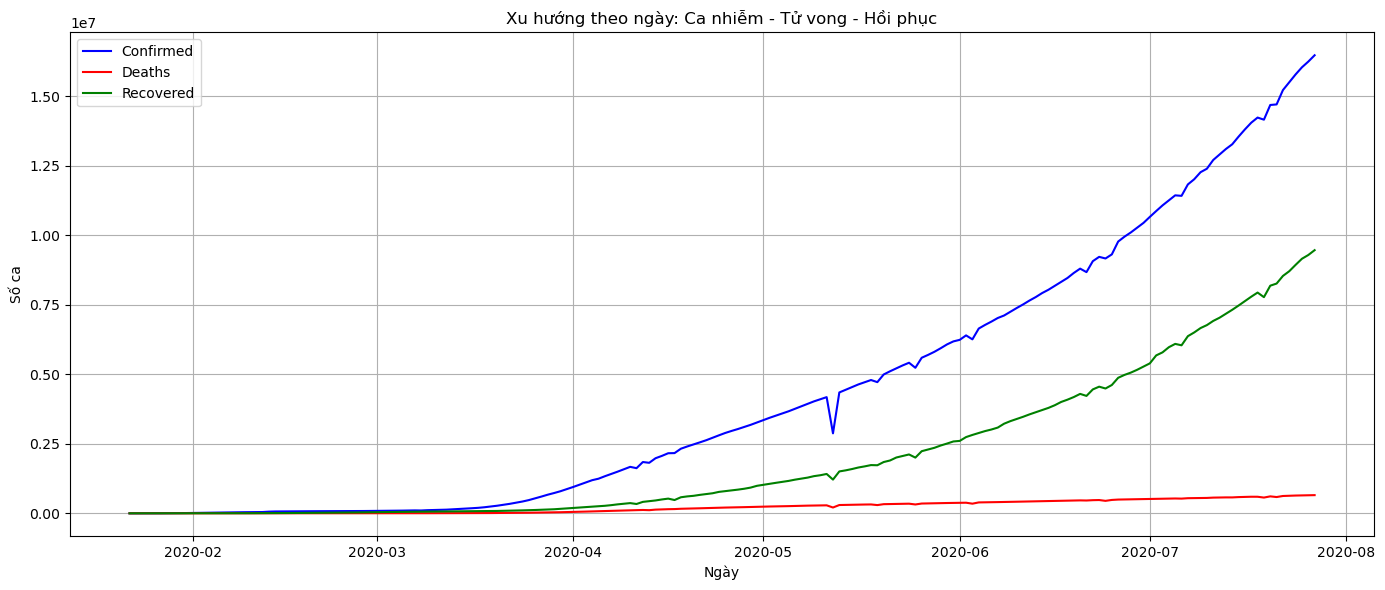

In [143]:
import matplotlib.pyplot as plt

# Đảm bảo cột 'date' đã là datetime
df['date'] = pd.to_datetime(df['date'])

# Gộp dữ liệu theo ngày (nếu cần)
daily_df = df.groupby('date')[['confirmed', 'deaths', 'recovered']].sum()

# Vẽ biểu đồ đường theo ngày
plt.figure(figsize=(14, 6))
plt.plot(daily_df.index, daily_df['confirmed'], label='Confirmed', color='blue')
plt.plot(daily_df.index, daily_df['deaths'], label='Deaths', color='red')
plt.plot(daily_df.index, daily_df['recovered'], label='Recovered', color='green')
plt.title('Xu hướng theo ngày: Ca nhiễm - Tử vong - Hồi phục')
plt.xlabel('Ngày')
plt.ylabel('Số ca')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


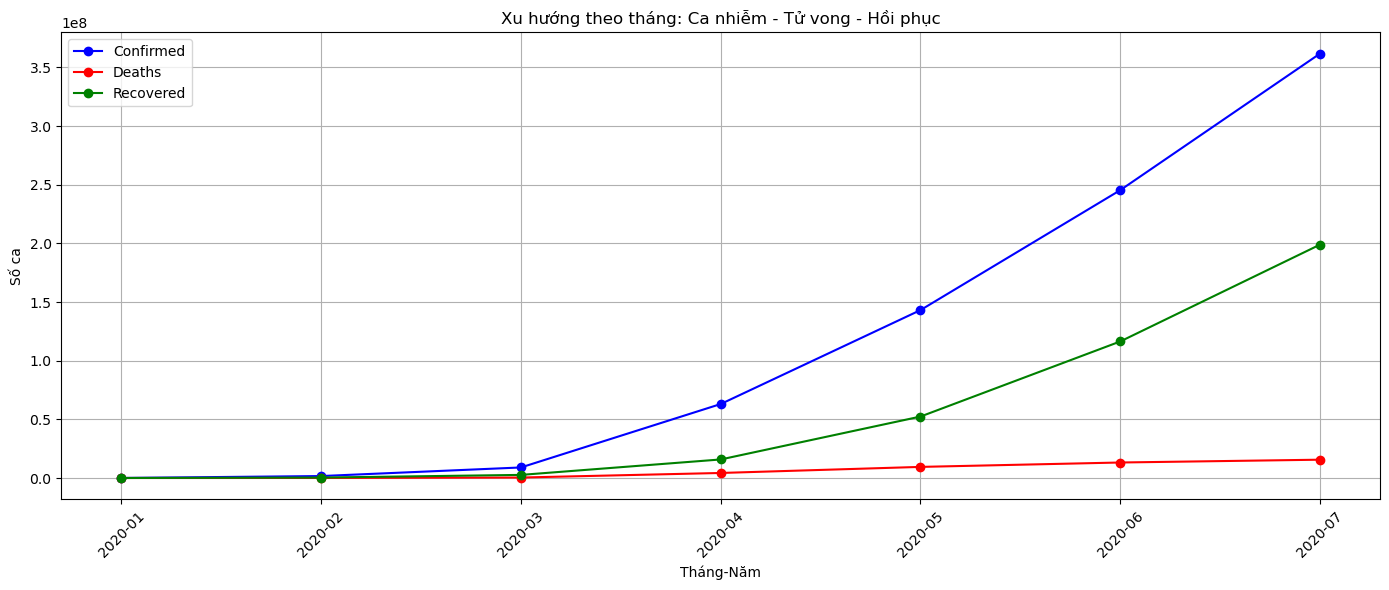

In [144]:
# Gộp dữ liệu theo tháng-năm
monthly_df = df.groupby('month_year')[['confirmed', 'deaths', 'recovered']].sum()

# Vẽ biểu đồ đường theo tháng-năm
plt.figure(figsize=(14, 6))
plt.plot(monthly_df.index, monthly_df['confirmed'], label='Confirmed', color='blue', marker='o')
plt.plot(monthly_df.index, monthly_df['deaths'], label='Deaths', color='red', marker='o')
plt.plot(monthly_df.index, monthly_df['recovered'], label='Recovered', color='green', marker='o')
plt.title('Xu hướng theo tháng: Ca nhiễm - Tử vong - Hồi phục')
plt.xlabel('Tháng-Năm')
plt.ylabel('Số ca')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [145]:
peak_confirmed = daily_df['confirmed'].idxmax()
peak_deaths = daily_df['deaths'].idxmax()
peak_recovered = daily_df['recovered'].idxmax()

print(f"🔥 Đỉnh ca nhiễm: {peak_confirmed}")
print(f"⚰️ Đỉnh tử vong: {peak_deaths}")
print(f"💪 Đỉnh hồi phục: {peak_recovered}")


🔥 Đỉnh ca nhiễm: 2020-07-27 00:00:00
⚰️ Đỉnh tử vong: 2020-07-27 00:00:00
💪 Đỉnh hồi phục: 2020-07-27 00:00:00


### 2. So sánh giữa các quốc gia

In [146]:
import pandas as pd

# Giả sử df là DataFrame chứa dữ liệu COVID-19, gồm các cột:
# 'country', 'confirmed', 'deaths', 'recovered'

# Bước 1: Tính tổng số ca theo từng quốc gia
country_stats = df.groupby('country_region')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Bước 2: Tính tỷ lệ tử vong và tỷ lệ hồi phục
country_stats['death_rate'] = country_stats['deaths'] / country_stats['confirmed']
country_stats['recovery_rate'] = country_stats['recovered'] / country_stats['confirmed']

# Bước 3: Tìm quốc gia có tỷ lệ tử vong cao nhất
highest_death_rate = country_stats.sort_values(by='death_rate', ascending=False).head(1)

# Bước 4: Tìm quốc gia có tỷ lệ hồi phục cao nhất
highest_recovery_rate = country_stats.sort_values(by='recovery_rate', ascending=False).head(1)

# Hiển thị kết quả
print("Quốc gia có tỷ lệ tử vong cao nhất:")
print(highest_death_rate[['country_region', 'death_rate']])

print("=========================================")

print("\nQuốc gia có tỷ lệ hồi phục cao nhất:")
print(highest_recovery_rate[['country_region', 'recovery_rate']])



Quốc gia có tỷ lệ tử vong cao nhất:
    country_region  death_rate
184          Yemen    0.263822

Quốc gia có tỷ lệ hồi phục cao nhất:
    country_region  recovery_rate
100  Liechtenstein       0.914167


### 3. Tỷ lệ tử vong và hồi phục

In [147]:
# Tính tỷ lệ tử vong và hồi phục

import pandas as pd

# Giả sử df là DataFrame chứa dữ liệu COVID-19
df['death_rate'] = df['deaths'] / df['confirmed']
df['recovery_rate'] = df['recovered'] / df['confirmed']


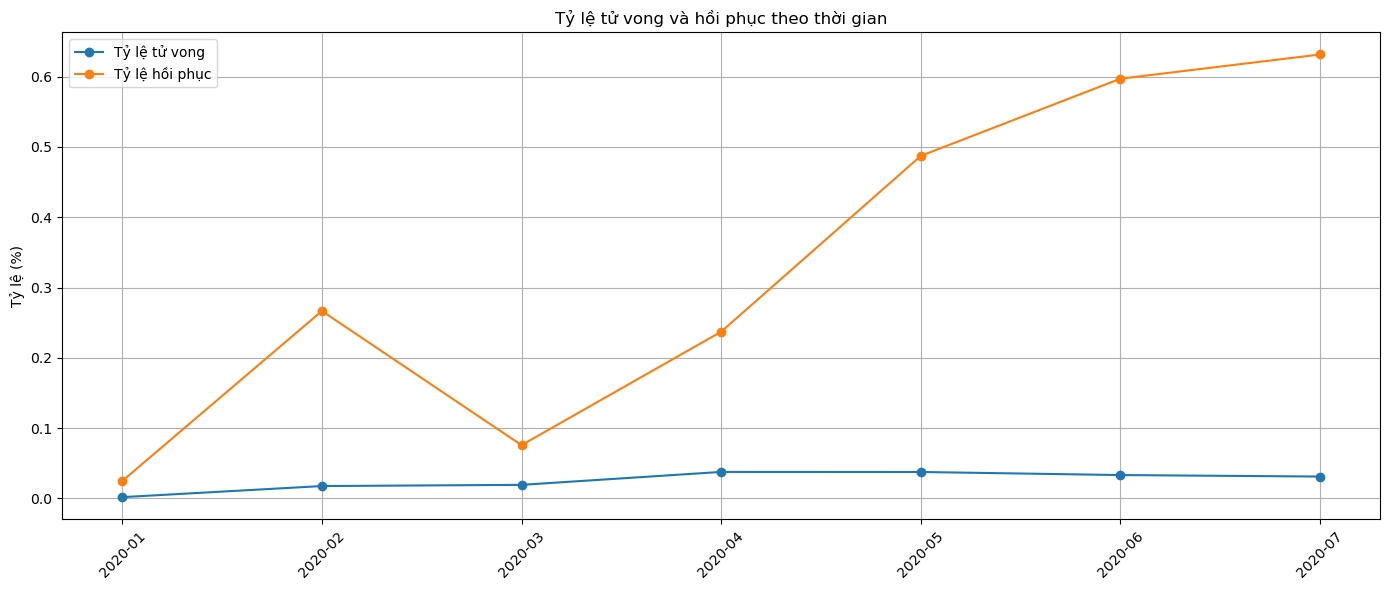

In [148]:
# So sánh theo thời gian (vd: theo tháng-năm)

# Đảm bảo cột 'date' là datetime
df['date'] = pd.to_datetime(df['date'])

# Tạo cột 'month_year'
df['month_year'] = df['date'].dt.to_period('M').astype(str)

# Trung bình tỷ lệ theo tháng-năm
monthly = df.groupby('month_year')[['death_rate', 'recovery_rate']].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(monthly['month_year'], monthly['death_rate'], label='Tỷ lệ tử vong', marker='o')
plt.plot(monthly['month_year'], monthly['recovery_rate'], label='Tỷ lệ hồi phục', marker='o')
plt.xticks(rotation=45)
plt.ylabel("Tỷ lệ (%)")
plt.title("Tỷ lệ tử vong và hồi phục theo thời gian")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 4. Phân tích theo nhóm thời gian

In [149]:
# Tạo nhóm thời gian theo quý và năm

# Đảm bảo cột 'date' là datetime
df['date'] = pd.to_datetime(df['date'])

# Thêm cột 'year' và 'quarter'
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.to_period('Q').astype(str)  # VD: '2020Q1'

# Tính tỷ lệ tử vong và hồi phục (nếu chưa tính)
df['death_rate'] = df['deaths'] / df['confirmed'] * 100
df['recovery_rate'] = df['recovered'] / df['confirmed'] * 100

# Nhóm theo quý
quarterly = df.groupby('quarter')[['confirmed', 'deaths', 'recovered', 'death_rate', 'recovery_rate']].mean().reset_index()


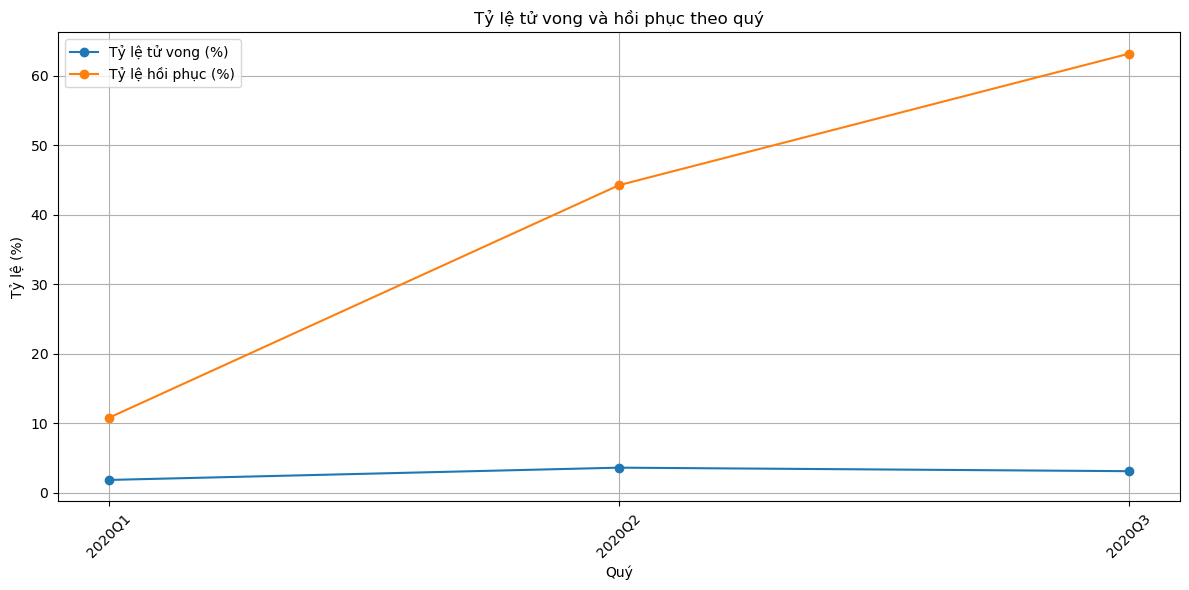

In [150]:
# Vẽ biểu đồ theo quý

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(quarterly['quarter'], quarterly['death_rate'], label='Tỷ lệ tử vong (%)', marker='o')
plt.plot(quarterly['quarter'], quarterly['recovery_rate'], label='Tỷ lệ hồi phục (%)', marker='o')
plt.xticks(rotation=45)
plt.title("Tỷ lệ tử vong và hồi phục theo quý")
plt.ylabel("Tỷ lệ (%)")
plt.xlabel("Quý")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [151]:
# So sánh theo giai đoạn lockdown hoặc vaccine rollout

# Gắn nhãn thủ công dựa theo mốc thời gian
def classify_period(date):
    if date < pd.Timestamp('2020-04-01'):
        return 'Trước lockdown'
    elif date < pd.Timestamp('2021-01-01'):
        return 'Trong lockdown'
    elif date < pd.Timestamp('2021-06-01'):
        return 'Vaccine rollout'
    else:
        return 'Hậu vaccine'

df['period'] = df['date'].apply(classify_period)

# Tính trung bình theo giai đoạn
period_stats = df.groupby('period')[['confirmed', 'deaths', 'recovered', 'death_rate', 'recovery_rate']].mean().reset_index()


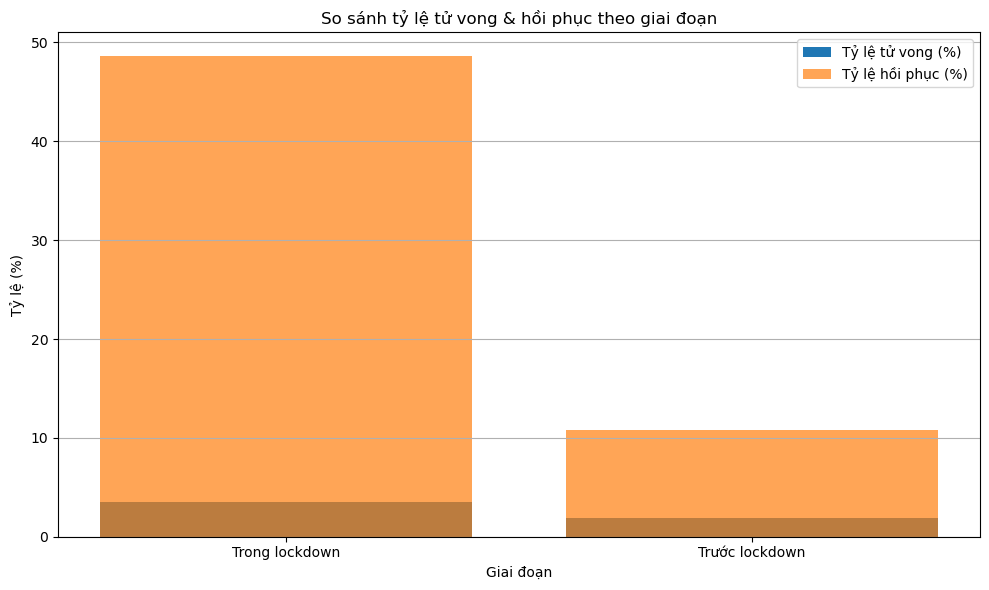

In [152]:
# Vẽ biểu đồ theo giai đoạn

plt.figure(figsize=(10,6))
plt.bar(period_stats['period'], period_stats['death_rate'], label='Tỷ lệ tử vong (%)')
plt.bar(period_stats['period'], period_stats['recovery_rate'], label='Tỷ lệ hồi phục (%)', alpha=0.7)
plt.title("So sánh tỷ lệ tử vong & hồi phục theo giai đoạn")
plt.ylabel("Tỷ lệ (%)")
plt.xlabel("Giai đoạn")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


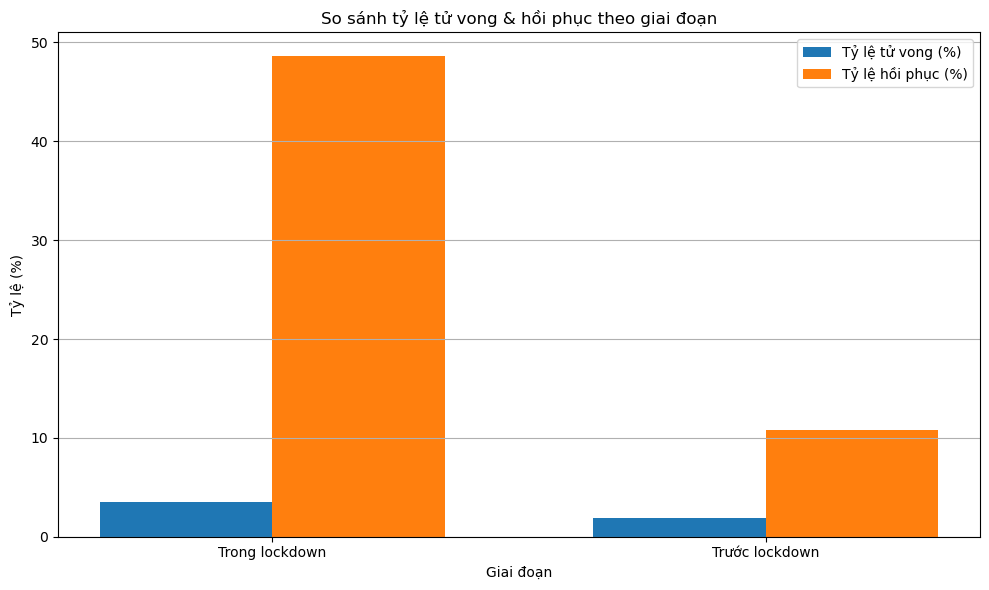

In [153]:
import numpy as np

plt.figure(figsize=(10,6))

x = np.arange(len(period_stats['period']))  # Vị trí các cột
width = 0.35  # Độ rộng của từng cột

plt.bar(x - width/2, period_stats['death_rate'], width, label='Tỷ lệ tử vong (%)')
plt.bar(x + width/2, period_stats['recovery_rate'], width, label='Tỷ lệ hồi phục (%)')

plt.xticks(x, period_stats['period'])
plt.title("So sánh tỷ lệ tử vong & hồi phục theo giai đoạn")
plt.ylabel("Tỷ lệ (%)")
plt.xlabel("Giai đoạn")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


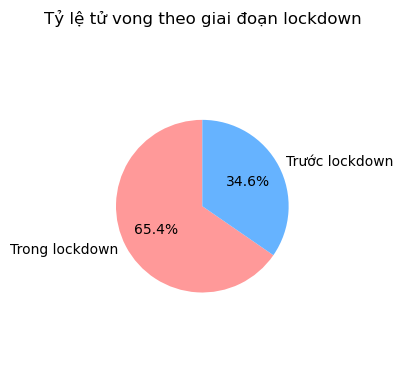

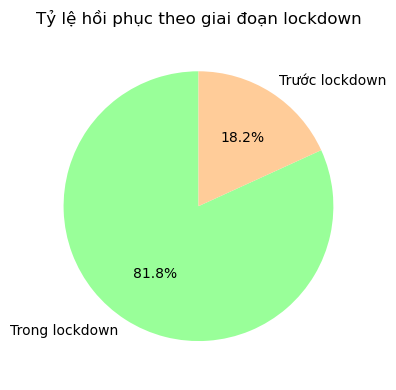

In [154]:
# Bước 1: Xác định mốc lockdown

# Đảm bảo cột 'date' là datetime
df['date'] = pd.to_datetime(df['date'])

# Tạo cột 'period' theo thời gian lockdown
df['period'] = df['date'].apply(lambda x: 'Trước lockdown' if x < pd.Timestamp('2020-04-01') else 'Trong lockdown')

# Bước 2: Tính tỷ lệ trung bình theo giai đoạn

# Tính trung bình theo giai đoạn
period_stats = df.groupby('period')[['death_rate', 'recovery_rate']].mean().reset_index()

# Bước 3: Vẽ biểu đồ pie

import matplotlib.pyplot as plt

# Pie chart tỷ lệ tử vong
plt.figure(figsize=(4, 4))
plt.pie(period_stats['death_rate'], labels=period_stats['period'], autopct='%.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Tỷ lệ tử vong theo giai đoạn lockdown")
plt.axis('equal')
plt.tight_layout()
plt.show()

# Pie chart tỷ lệ hồi phục
plt.figure(figsize=(4, 4))
plt.pie(period_stats['recovery_rate'], labels=period_stats['period'], autopct='%.1f%%', startangle=90, colors=['#99ff99','#ffcc99'])
plt.title("Tỷ lệ hồi phục theo giai đoạn lockdown")
plt.axis('equal')
plt.tight_layout()
plt.show()



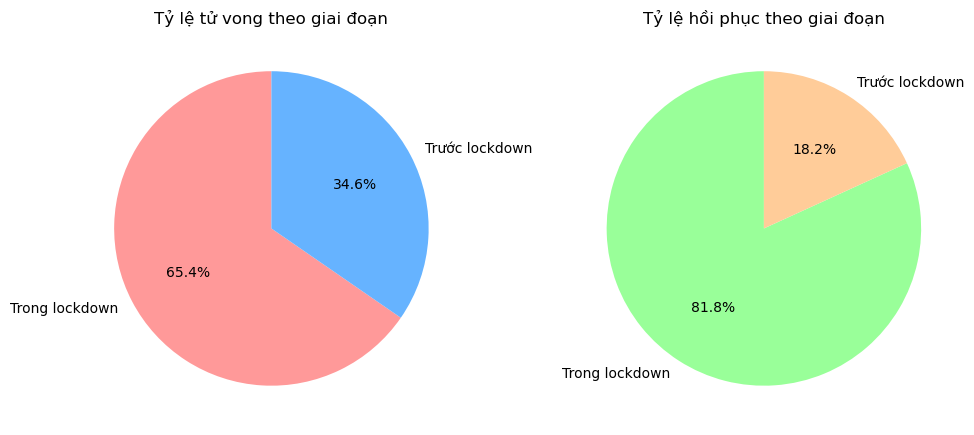

In [155]:
import matplotlib.pyplot as plt

# Bước 1: Đảm bảo cột 'date' là datetime
df['date'] = pd.to_datetime(df['date'])

# Bước 2: Gắn nhãn giai đoạn
df['period'] = df['date'].apply(lambda x: 'Trước lockdown' if x < pd.Timestamp('2020-04-01') else 'Trong lockdown')

# Bước 3: Tính trung bình tỷ lệ tử vong và hồi phục theo giai đoạn
period_stats = df.groupby('period')[['death_rate', 'recovery_rate']].mean().reset_index()

# Bước 4: Vẽ 2 biểu đồ pie trong 1 hàng 2 cột
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Biểu đồ pie: Tỷ lệ tử vong
axs[0].pie(period_stats['death_rate'], 
           labels=period_stats['period'], 
           autopct='%.1f%%', 
           startangle=90, 
           colors=['#ff9999','#66b3ff'])
axs[0].set_title("Tỷ lệ tử vong theo giai đoạn")

# Biểu đồ pie: Tỷ lệ hồi phục
axs[1].pie(period_stats['recovery_rate'], 
           labels=period_stats['period'], 
           autopct='%.1f%%', 
           startangle=90, 
           colors=['#99ff99','#ffcc99'])
axs[1].set_title("Tỷ lệ hồi phục theo giai đoạn")

plt.tight_layout()
plt.show()


### 5. Phân tích mức độ bùng phát

In [156]:
# Phân tích sự bùng phát ca nhiễm

import pandas as pd

# Đảm bảo cột 'date' và 'confirmed' tồn tại và đúng định dạng
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')  # Sắp xếp theo ngày

# Tính số ca nhiễm mới mỗi ngày
df['daily_new_cases'] = df['confirmed'].diff()

# Tính phần trăm thay đổi ca nhiễm hàng ngày
df['daily_growth_pct'] = df['daily_new_cases'].pct_change() * 100

# Gộp theo tuần
df_weekly = df.resample('W-Mon', on='date').sum().reset_index().sort_values('date')

# Tính số ca nhiễm mới mỗi tuần
df_weekly['weekly_growth'] = df_weekly['confirmed'].diff()

# Tính phần trăm thay đổi ca nhiễm hàng tuần
df_weekly['weekly_growth_pct'] = df_weekly['weekly_growth'].pct_change() * 100

# Hiển thị 10 dòng đầu
print("📈 Tăng trưởng hàng ngày:")
print(df[['date', 'confirmed', 'daily_new_cases', 'daily_growth_pct']].head(10))

print("\n📊 Tăng trưởng hàng tuần:")
print(df_weekly[['date', 'confirmed', 'weekly_growth', 'weekly_growth_pct']].head(10))


📈 Tăng trưởng hàng ngày:
          date  confirmed  daily_new_cases  daily_growth_pct
0   2020-01-22          0              NaN               NaN
120 2020-01-22          0              0.0               NaN
121 2020-01-22          0              0.0               NaN
122 2020-01-22          0              0.0               NaN
123 2020-01-22          0              0.0               NaN
124 2020-01-22          0              0.0               NaN
125 2020-01-22          0              0.0               NaN
126 2020-01-22          0              0.0               NaN
127 2020-01-22          0              0.0               NaN
128 2020-01-22          0              0.0               NaN

📊 Tăng trưởng hàng tuần:
        date  confirmed  weekly_growth  weekly_growth_pct
0 2020-01-27       8629            NaN                NaN
1 2020-02-03      78617        69988.0                NaN
2 2020-02-10     236473       157856.0         125.547237
3 2020-02-17     430591       194118.0        

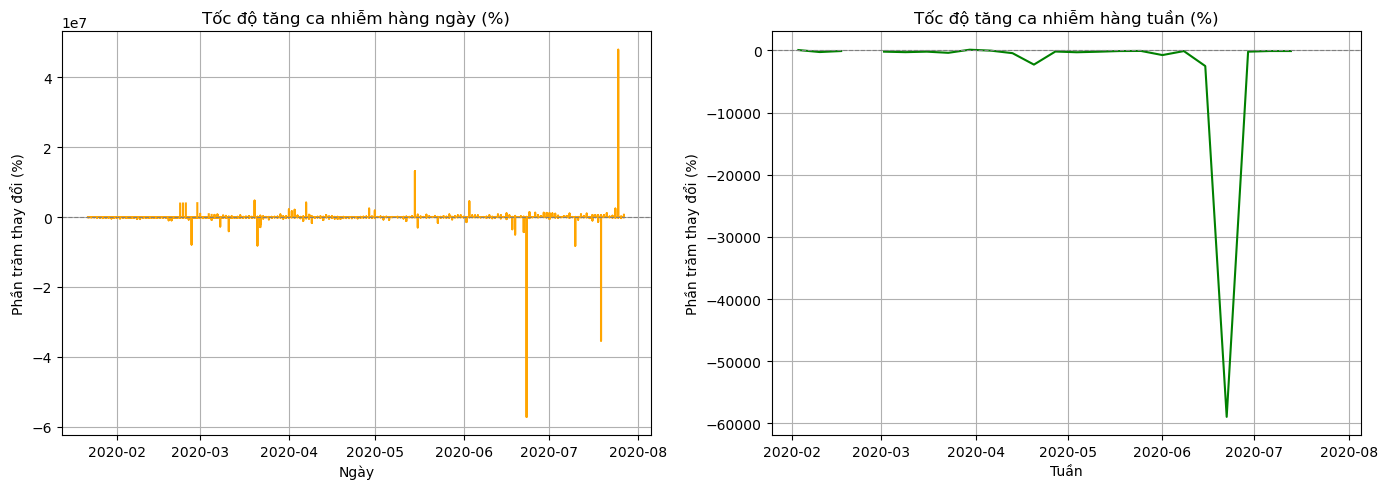

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# Đảm bảo cột 'date' là datetime và được sắp xếp theo thời gian
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Tính số ca nhiễm mới hàng ngày (giả sử cột 'confirmed' có dữ liệu tích lũy)
df['daily_new_cases'] = df['confirmed'].diff()

# Tính phần trăm thay đổi hàng ngày
df['daily_pct_change'] = df['daily_new_cases'].pct_change() * 100

# Tính tổng số ca nhiễm mới theo tuần
df['week'] = df['date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_cases = df.groupby('week')['daily_new_cases'].sum().reset_index()

# Tính phần trăm thay đổi theo tuần
weekly_cases['weekly_pct_change'] = weekly_cases['daily_new_cases'].pct_change() * 100

# --- Vẽ biểu đồ ---
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ thay đổi hàng ngày
axs[0].plot(df['date'], df['daily_pct_change'], color='orange')
axs[0].set_title('Tốc độ tăng ca nhiễm hàng ngày (%)')
axs[0].set_ylabel('Phần trăm thay đổi (%)')
axs[0].set_xlabel('Ngày')
axs[0].axhline(0, color='gray', linestyle='--', linewidth=0.8)
axs[0].grid(True)

# Biểu đồ thay đổi hàng tuần
axs[1].plot(weekly_cases['week'], weekly_cases['weekly_pct_change'], color='green')
axs[1].set_title('Tốc độ tăng ca nhiễm hàng tuần (%)')
axs[1].set_ylabel('Phần trăm thay đổi (%)')
axs[1].set_xlabel('Tuần')
axs[1].axhline(0, color='gray', linestyle='--', linewidth=0.8)
axs[1].grid(True)

plt.tight_layout()
plt.show()


### Phân tích theo khu vực

In [159]:
df.head()

,date,country_region,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,who_region,...,year,month_year,death_rate,recovery_rate,quarter,period,daily_new_cases,daily_growth_pct,daily_pct_change,week
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,...,2020,2020-01,NaN,NaN,2020Q1,Trước lockdown,NaN,NaN,NaN,2020-01-20
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,...,2020,2020-01,NaN,NaN,2020Q1,Trước lockdown,0.0,NaN,NaN,2020-01-20
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,...,2020,2020-01,NaN,NaN,2020Q1,Trước lockdown,0.0,NaN,NaN,2020-01-20
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,...,2020,2020-01,NaN,NaN,2020Q1,Trước lockdown,0.0,NaN,NaN,2020-01-20
5,2020-01-22,Antigua and Barbuda,0,0,0,0,0,0,0,Americas,...,2020,2020-01,NaN,NaN,2020Q1,Trước lockdown,0.0,NaN,NaN,2020-01-20


In [160]:
# Tính tổng và tỷ lệ trung bình theo khu vực
# Nhóm theo khu vực WHO
region_summary = df.groupby("who_region").agg({
    "confirmed": "sum",
    "deaths": "sum",
    "recovered": "sum",
    "active": "sum"
})

# Tính tỷ lệ tử vong và hồi phục
region_summary["death_rate"] = region_summary["deaths"] / region_summary["confirmed"]
region_summary["recovery_rate"] = region_summary["recovered"] / region_summary["confirmed"]

# Làm đẹp dữ liệu: làm tròn
region_summary = region_summary.round(4)

# Hiển thị
region_summary.sort_values("confirmed", ascending=False)


,confirmed,deaths,recovered,active,death_rate,recovery_rate
who_region,,,,,,
Americas,400015685,19219682,156289944,224506059,0.0480,0.3907
Europe,246830467,19055771,122258200,105516496,0.0772,0.4953
Eastern Mediterranean,74080449,1923968,48050075,24106406,0.0260,0.6486
South-East Asia,55117856,1458130,30030301,23629425,0.0265,0.5448
Western Pacific,26240959,926499,18749246,6565214,0.0353,0.7145
Africa,21771106,439237,11183493,10148376,0.0202,0.5137


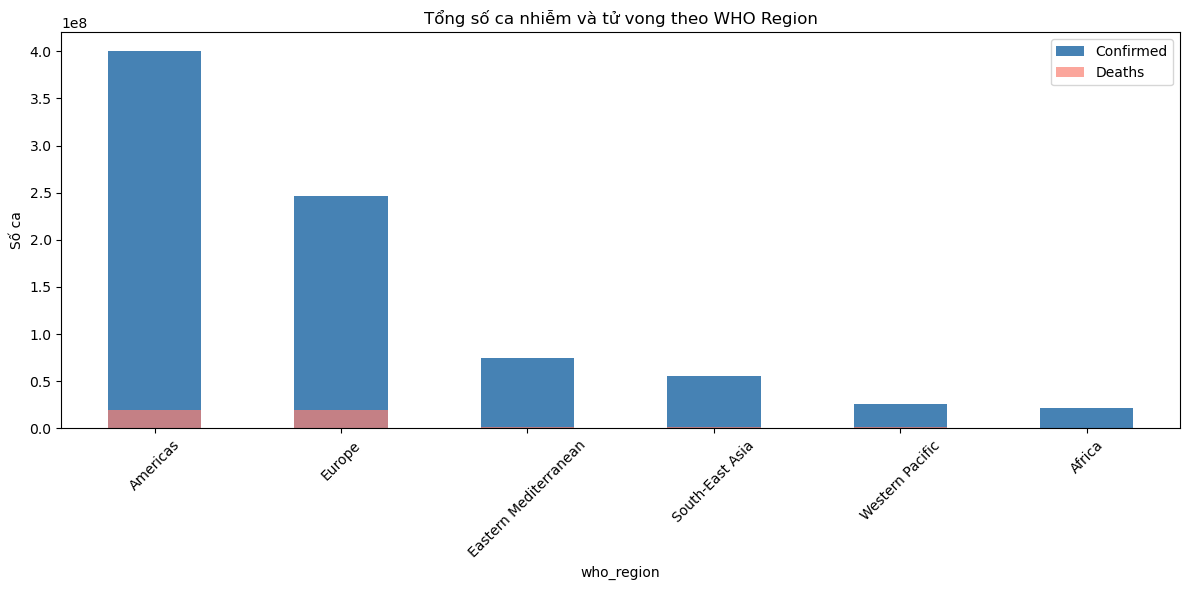

In [161]:
# Bar chart: Số ca nhiễm và tử vong theo khu vực

import matplotlib.pyplot as plt

region_summary_sorted = region_summary.sort_values("confirmed", ascending=False)

plt.figure(figsize=(12,6))
region_summary_sorted["confirmed"].plot(kind="bar", color="steelblue", label="Confirmed")
region_summary_sorted["deaths"].plot(kind="bar", color="salmon", alpha=0.7, label="Deaths")

plt.title("Tổng số ca nhiễm và tử vong theo WHO Region")
plt.ylabel("Số ca")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


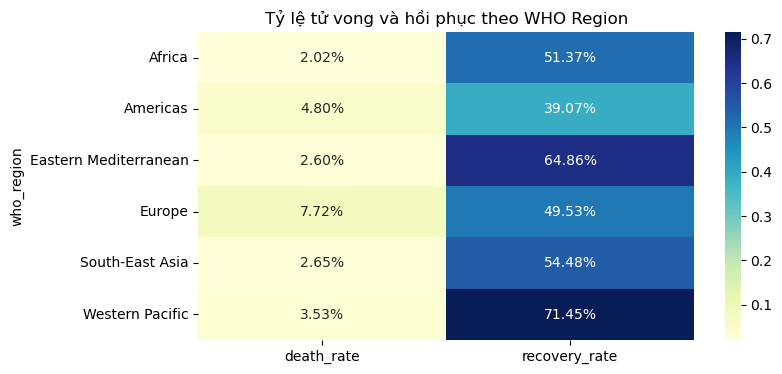

In [162]:
# Heatmap: Tỷ lệ tử vong và hồi phục theo khu vực

import seaborn as sns

plt.figure(figsize=(8,4))
sns.heatmap(region_summary[["death_rate", "recovery_rate"]], annot=True, cmap="YlGnBu", fmt=".2%")
plt.title("Tỷ lệ tử vong và hồi phục theo WHO Region")
plt.show()


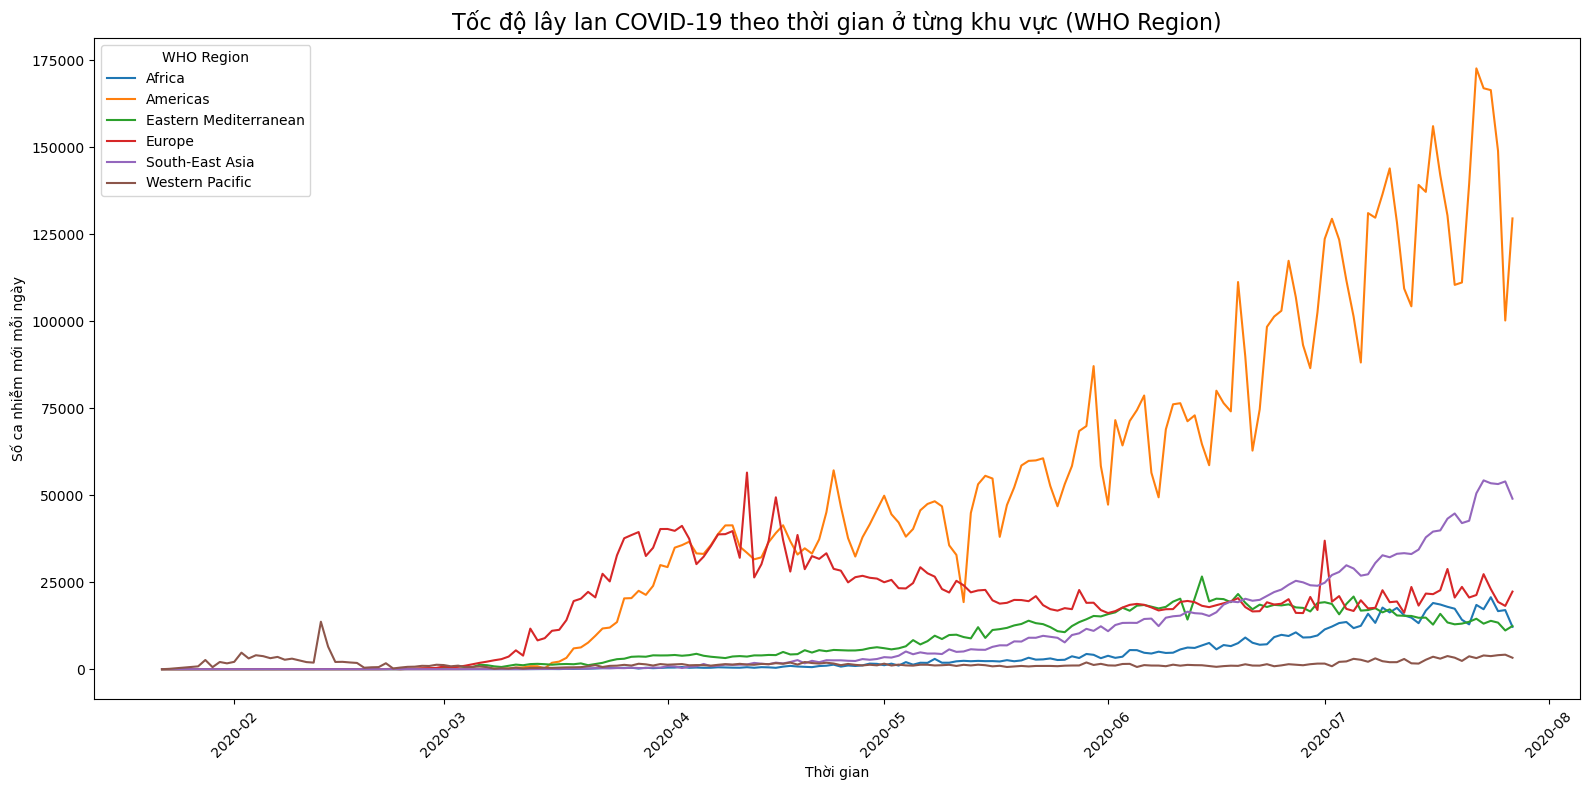

In [163]:
# Phân tích tốc độ lây lan theo thời gian ở mỗi khu vực

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đảm bảo cột ngày có định dạng datetime
df['date'] = pd.to_datetime(df['date'])

# Loại bỏ các dòng thiếu dữ liệu new_cases hoặc who_region
df_filtered = df.dropna(subset=['new_cases', 'who_region'])

# Tổng số ca nhiễm mới theo ngày và khu vực
region_daily = df_filtered.groupby(['date', 'who_region'])['new_cases'].sum().reset_index()

# Thiết lập biểu đồ
plt.figure(figsize=(16, 8))
sns.lineplot(data=region_daily, x='date', y='new_cases', hue='who_region')

# Tùy chỉnh biểu đồ
plt.title('Tốc độ lây lan COVID-19 theo thời gian ở từng khu vực (WHO Region)', fontsize=16)
plt.xlabel('Thời gian')
plt.ylabel('Số ca nhiễm mới mỗi ngày')
plt.xticks(rotation=45)
plt.legend(title='WHO Region')
plt.tight_layout()

plt.show()


<Figure size 1400x600 with 0 Axes>

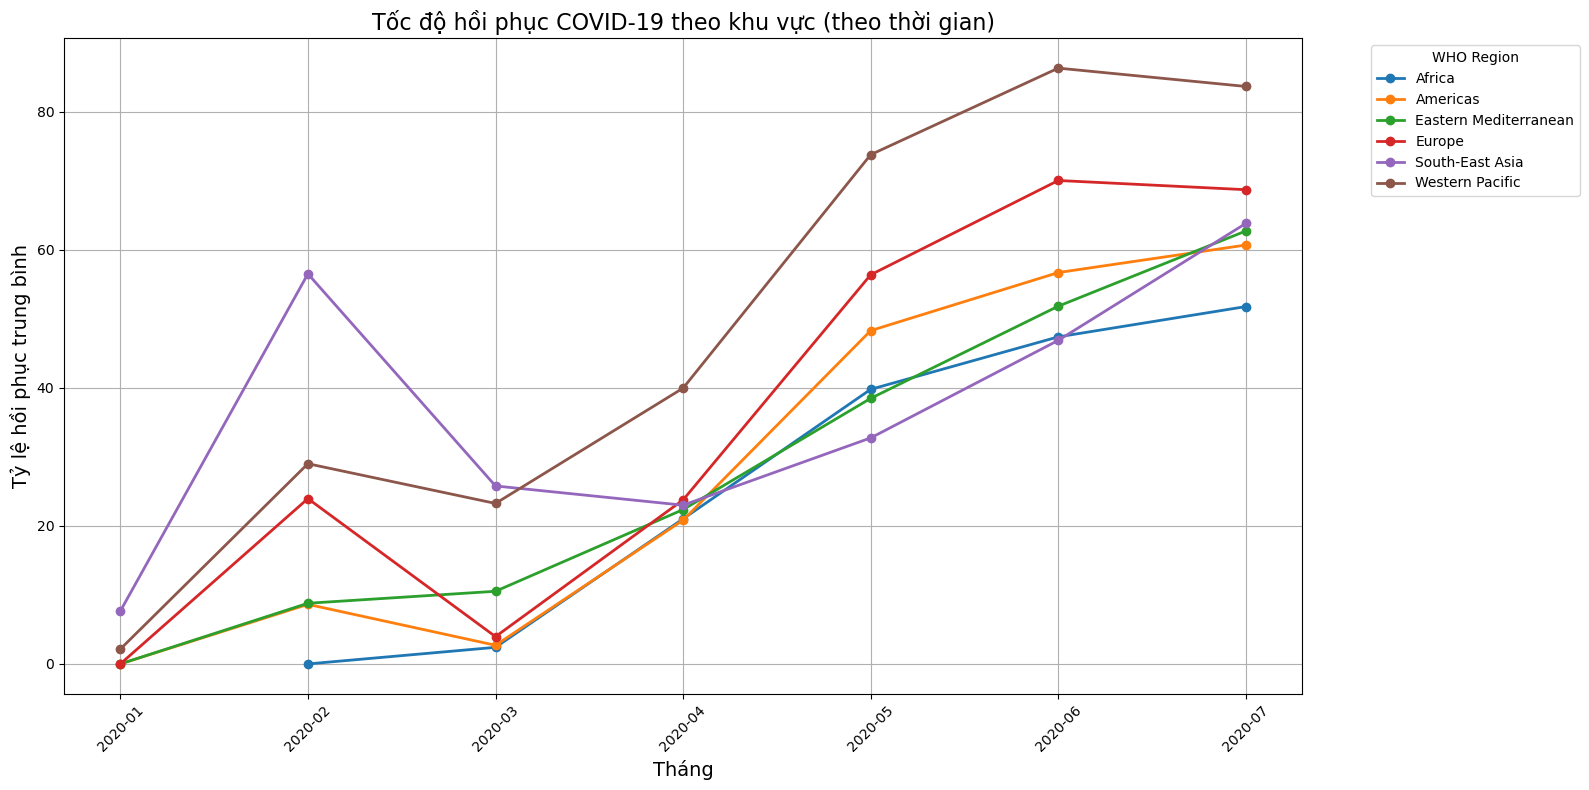

In [164]:
# Phân tích tốc độ hồi phục theo khu vực (who_region)
# Bước 1: Tính tốc độ hồi phục trung bình theo tháng và khu vực

# Tính tốc độ hồi phục trung bình theo tháng và khu vực
recovery_by_region = df.groupby(['month_year', 'who_region'])['recovery_rate'].mean().reset_index()

# Pivot để dễ vẽ biểu đồ
recovery_pivot = recovery_by_region.pivot(index='month_year', columns='who_region', values='recovery_rate')

# Bước 2: Vẽ biểu đồ xu hướng tốc độ hồi phục
plt.figure(figsize=(14, 6))
recovery_pivot.plot(marker='o', figsize=(16, 8), linewidth=2)
plt.title('Tốc độ hồi phục COVID-19 theo khu vực (theo thời gian)', fontsize=16)
plt.xlabel('Tháng', fontsize=14)
plt.ylabel('Tỷ lệ hồi phục trung bình', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='WHO Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_15560\1318348015.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_cases.values, y=region_cases.index, ax=axes[0], palette="Blues_d")


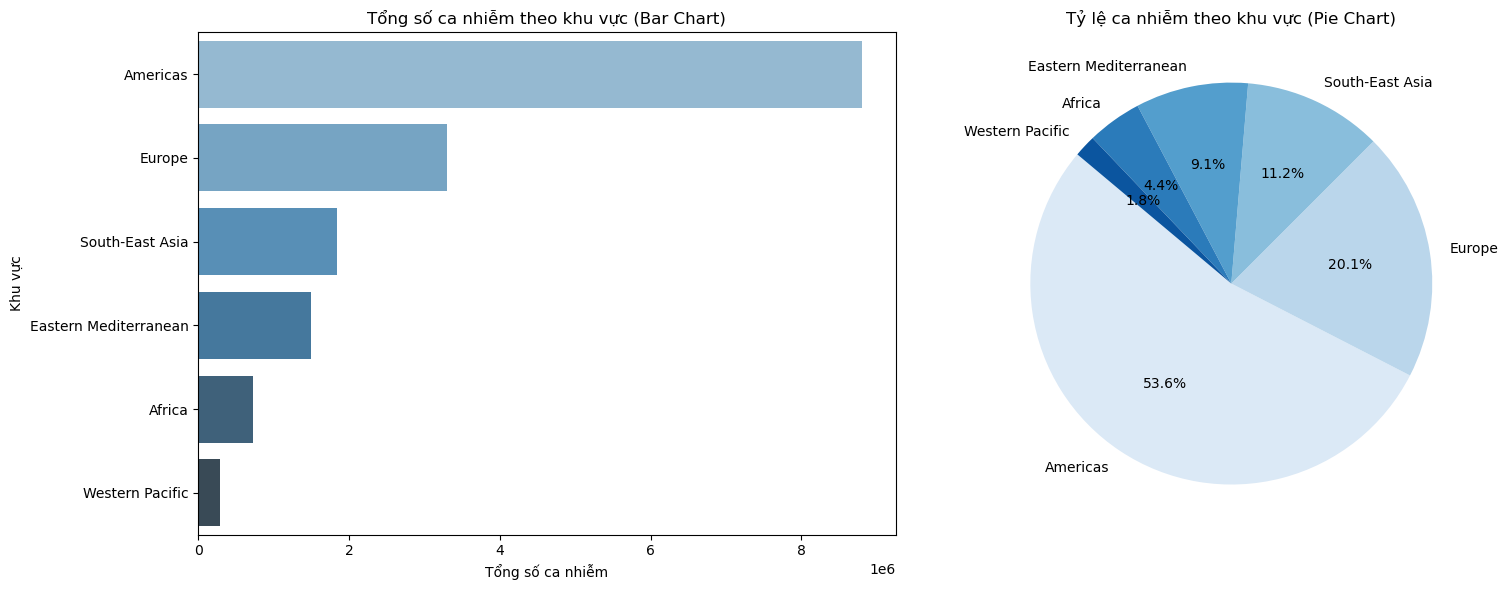

In [165]:
# Tổng ca nhiễm từng khu vực

import matplotlib.pyplot as plt
import seaborn as sns

# Tổng số ca nhiễm theo khu vực
region_cases = df.groupby('who_region')['new_cases'].sum().sort_values(ascending=False)

# Tạo biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
sns.barplot(x=region_cases.values, y=region_cases.index, ax=axes[0], palette="Blues_d")
axes[0].set_title('Tổng số ca nhiễm theo khu vực (Bar Chart)')
axes[0].set_xlabel('Tổng số ca nhiễm')
axes[0].set_ylabel('Khu vực')

# Pie chart
axes[1].pie(region_cases.values, labels=region_cases.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Blues", len(region_cases)))
axes[1].set_title('Tỷ lệ ca nhiễm theo khu vực (Pie Chart)')

plt.tight_layout()
plt.show()


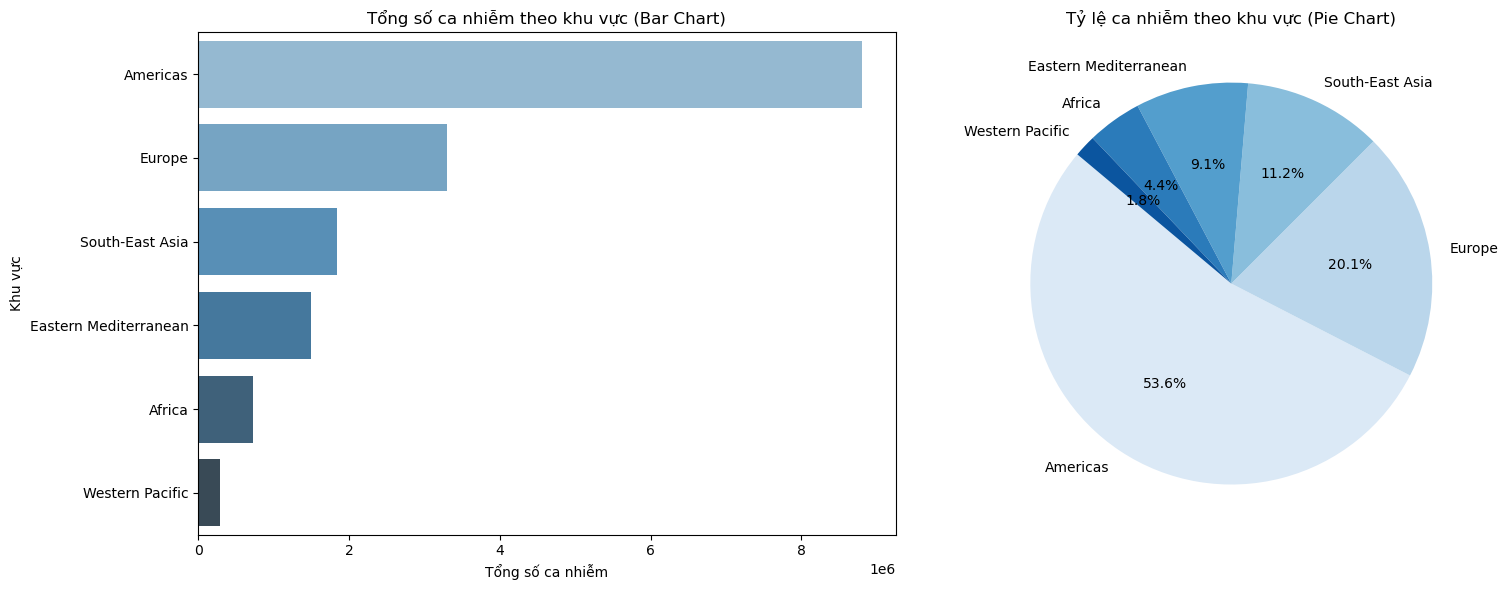

In [166]:
# Tổng ca nhiễm từng khu vực

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Giả sử df là DataFrame gốc và đã có cột 'who_region' và 'new_cases'
region_cases = df.groupby('who_region')['new_cases'].sum().sort_values(ascending=False).reset_index()

# Tạo biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ Bar: dùng hue để tránh cảnh báo
sns.barplot(
    data=region_cases,
    x='new_cases',
    y='who_region',
    hue='who_region',
    dodge=False,
    palette='Blues_d',
    ax=axes[0],
    legend=False  # Tắt legend nếu không cần
)
axes[0].set_title('Tổng số ca nhiễm theo khu vực (Bar Chart)')
axes[0].set_xlabel('Tổng số ca nhiễm')
axes[0].set_ylabel('Khu vực')

# Biểu đồ Pie
axes[1].pie(
    region_cases['new_cases'],
    labels=region_cases['who_region'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Blues", len(region_cases))
)
axes[1].set_title('Tỷ lệ ca nhiễm theo khu vực (Pie Chart)')

plt.tight_layout()
plt.show()
